In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

from wrangle import acquire_wine, wine_train_val_test, wrangle_wine

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)

In [3]:
df = acquire_wine()

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [7]:
# return how many 0 there is in each numerical columns in df
zeros_count = df.select_dtypes(include=['number']).eq(0).sum()
print(zeros_count)

fixed acidity             0
volatile acidity          0
citric acid             151
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
dtype: int64


In [8]:
df_quality = df.groupby('quality').size()
df_quality

quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
dtype: int64

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [10]:
df.columns = [col.lower().replace(' ', '_').replace('.', '_') for col in df.columns]

In [11]:
train, val, test = wine_train_val_test(df, seed=42)

In [12]:
train, val, test = wrangle_wine()

In [13]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type
3761,9.9,0.490,0.23,2.4,0.087,19.0,115.0,0.99480,2.77,0.44,9.400000,6,white
3740,7.7,0.280,0.35,15.3,0.056,31.0,117.0,0.99980,3.27,0.50,9.600000,5,white
1359,11.6,0.475,0.40,1.4,0.091,6.0,28.0,0.99704,3.07,0.65,10.033333,6,red
1230,7.7,0.180,0.34,2.7,0.066,15.0,58.0,0.99470,3.37,0.78,11.800000,6,red
4751,7.6,0.250,1.23,4.6,0.035,51.0,294.0,0.99018,3.03,0.43,13.100000,6,white


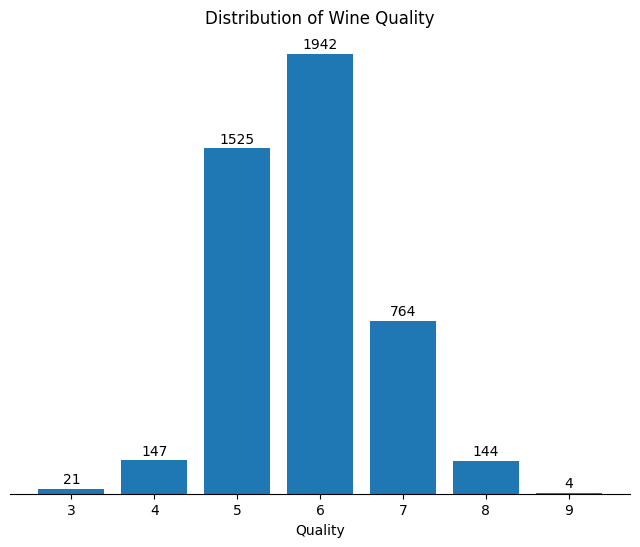

In [14]:
quality_counts = train['quality'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
ax = plt.bar(quality_counts.index, quality_counts.values)

# Add value counts on top of each bar
for i, v in enumerate(quality_counts.values):
    plt.text(quality_counts.index[i], v + 10, str(v), ha='center', va='bottom')


# Removing the y-axis
plt.gca().get_yaxis().set_visible(False)

# Removing left, right, and top lines of the current axes
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.xlabel('Quality')
plt.title('Distribution of Wine Quality')
plt.xticks(quality_counts.index)
plt.show()

___
## #1 Alcohol
___

In [15]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type
3761,9.9,0.490,0.23,2.4,0.087,19.0,115.0,0.99480,2.77,0.44,9.400000,6,white
3740,7.7,0.280,0.35,15.3,0.056,31.0,117.0,0.99980,3.27,0.50,9.600000,5,white
1359,11.6,0.475,0.40,1.4,0.091,6.0,28.0,0.99704,3.07,0.65,10.033333,6,red
1230,7.7,0.180,0.34,2.7,0.066,15.0,58.0,0.99470,3.37,0.78,11.800000,6,red
4751,7.6,0.250,1.23,4.6,0.035,51.0,294.0,0.99018,3.03,0.43,13.100000,6,white


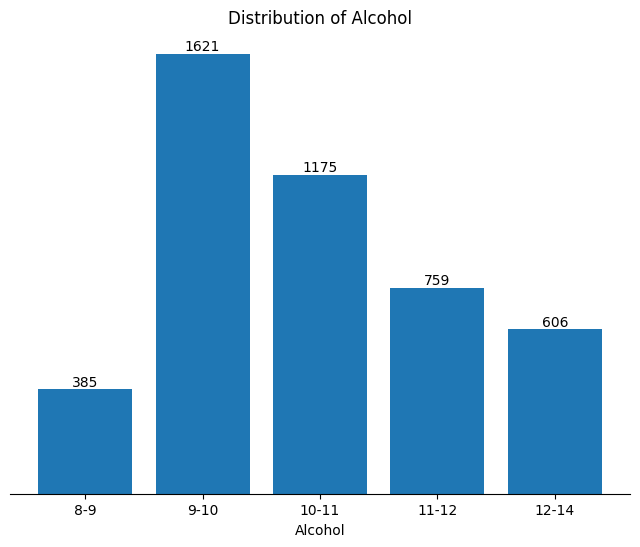

In [16]:
# Define the bin edges and labels
bin_edges = [8, 9, 10, 11, 12, 14]
bin_labels = ['8-9', '9-10', '10-11', '11-12', '12-14']

# Bin the 'alcohol' values
train['alcohol_bins'] = pd.cut(train['alcohol'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Count the values in each bin
alcohol_counts = train['alcohol_bins'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
ax = plt.bar(alcohol_counts.index, alcohol_counts.values)

# Adding value counts on top of each bar
for i, count in enumerate(alcohol_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Removing the y-axis
plt.gca().get_yaxis().set_visible(False)

# Removing left, right, and top lines of the current axes
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.xlabel('Alcohol')
plt.title('Distribution of Alcohol')
plt.xticks(alcohol_counts.index)

# Remove the "quality_bins" column from the DataFrame
train.drop(columns=['alcohol_bins'], inplace=True)

plt.show()


<font size="3">Is alcohol normally distributed?</font>

In [17]:
statistic, p_value = stats.shapiro(train['alcohol'])

if p_value > 0.05:
    print("Alcohol appears to be normally distributed (p-value =", p_value, " s-value=",statistic, ")")
else:
    print("Alcohol does not appear to be normally distributed (p-value =", p_value, " s-value=",statistic, ")")


Alcohol does not appear to be normally distributed (p-value = 2.2665958267318566e-36  s-value= 0.9515156149864197 )


<font size="3">Alcohol is `NOT` normally distributed?</font>

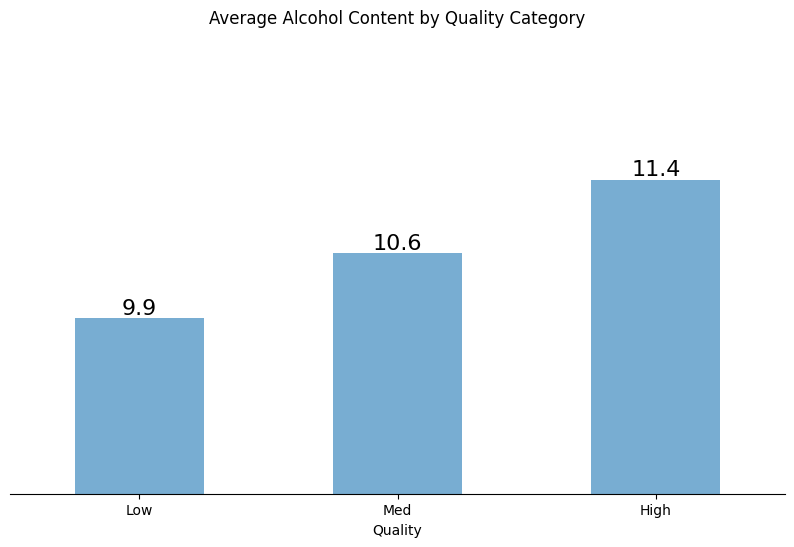

In [18]:
# Define custom labels for "quality"
bins_q = [3, 5, 6, 9]
labels_q = ['Low', 'Med', 'High']

# Create a new column "quality_bins" to store the bin labels
train['quality_bins'] = pd.cut(train['quality'], bins=bins_q, labels=labels_q)

# Group the data by "quality" and calculate the mean alcohol content for each quality category
quality_means = train.groupby('quality_bins')['alcohol'].mean().round(1)

# Create a bar plot
plt.figure(figsize=(10, 6))
quality_means.plot(kind='bar', color='#1f77b4', alpha=0.6)
plt.title('Average Alcohol Content by Quality Category')
plt.xlabel('Quality')
plt.ylabel('Average Alcohol Content')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Adding average on top of each bar
for i, count in enumerate(quality_means.values):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=16)

# Removing the y-axis
plt.gca().get_yaxis().set_visible(False)

# Removing left, right, and top lines of the current axes
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.ylim(8, 13)

# Remove the "quality_bins" column from the DataFrame
train.drop(columns=['quality_bins'], inplace=True)

# Show the plot
plt.show()

<font size="4"> **Hypothesis 1: Alcohol Content Impact**</font>
   <font size="3"> 
   
   - *Question:* `Does the Alcohol content impact wine Quality?`
   
   </font>

<font size="3"> H0: There is no statistically significant monotonic relationship between the quality of the wine and the alcohol content.</font>

<font size="3">Ha: There is a sstatistically significant monotonic relationship between the quality of the wine and the alcohol content.</font>

In [19]:
# Assuming you have a DataFrame named df with columns 'quality' and 'alcohol'
spearman_corr, p_value = stats.spearmanr(train['quality'], train['alcohol'])

# Interpret the results
alpha = 0.05  # Set your desired significance level

if p_value < alpha:
    print(f"There is a statistically significant Spearman's rank correlation (p-value = {p_value:.4f}, corr = {spearman_corr:.4f}).")
else:
    print(f"There is no statistically significant Spearman's rank correlation (p-value = {p_value:.4f}, corr = {spearman_corr:.4f}).")


There is a statistically significant Spearman's rank correlation (p-value = 0.0000, corr = 0.4471).


<font size="3">We `reject` the null hypothesis</font>

___
## #2 Density
___

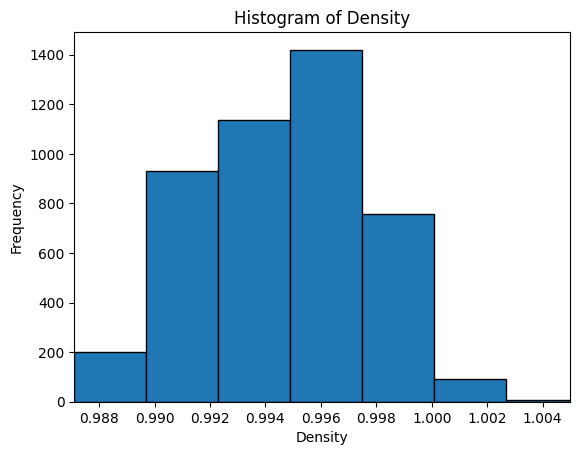

In [20]:
# Create a histogram
plt.hist(train.density, bins=20, edgecolor='black')

plt.xlim(min(train.density), 1.005)

# Add labels and title
plt.xlabel('Density')
plt.ylabel('Frequency')
plt.title('Histogram of Density')

# Display the histogram
plt.show()

In [21]:
statistic, p_value = stats.shapiro(train['density'])

if p_value > 0.05:
    print("Density appears to be normally distributed (p-value =", p_value, " s-value=",statistic, ")")
else:
    print("Density does not appear to be normally distributed (p-value =", p_value, " s-value=",statistic, ")")


Density does not appear to be normally distributed (p-value = 1.0160853782362848e-33  s-value= 0.959850013256073 )


<font size="3">Density is `NOT` normally distributed?</font>

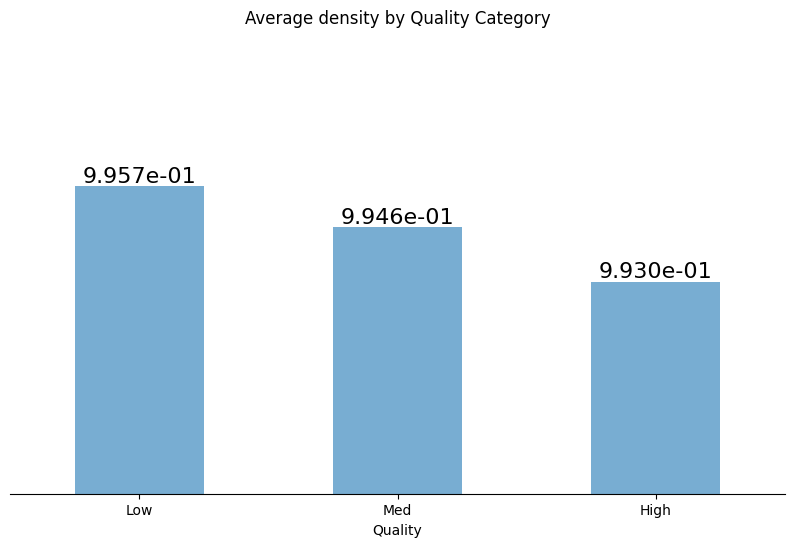

In [22]:
# Define custom labels for "quality"
bins_q = [3, 5, 6, 9]
labels_q = ['Low', 'Med', 'High']

# Create a new column "quality_bins" to store the bin labels
train['quality_bins'] = pd.cut(train['quality'], bins=bins_q, labels=labels_q)

# Group the data by "quality" and calculate the mean alcohol content for each quality category
quality_means = train.groupby('quality_bins')['density'].mean().round(6)

# Create a bar plot
plt.figure(figsize=(10, 6))
quality_means.plot(kind='bar', color='#1f77b4', alpha=0.6)
plt.title('Average density by Quality Category')
plt.xlabel('Quality')
plt.ylabel('Average Alcohol Content')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Adding average on top of each bar
for i, count in enumerate(quality_means.values):
    plt.text(i, count, '{:.3e}'.format(count), ha='center', va='bottom', fontsize=16)

# Removing the y-axis
plt.gca().get_yaxis().set_visible(False)

# Removing left, right, and top lines of the current axes
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.ylim(0.98711, 1)

# Remove the "quality_bins" column from the DataFrame
train.drop(columns=['quality_bins'], inplace=True)

# Show the plot
plt.show()

<font size="4"> **Hypothesis 2: Density Impact**</font>
   <font size="3"> 
   
   - *Question:* `Does the Density impact wine Quality?`
   </font>

H0: There is no statistically significant monotonic relationship between the quality of the wine and the alcohol content.

Ha: There is a sstatistically significant monotonic relationship between the quality of the wine and the alcohol content.

In [23]:
# Assuming you have a DataFrame named df with columns 'quality' and 'alcohol'
spearman_corr, p_value = stats.spearmanr(train['quality'], train['density'])

# Interpret the results
alpha = 0.05  # Set your desired significance level

if p_value < alpha:
    print(f"There is a statistically significant Spearman's rank correlation (p-value = {p_value:.4f}, corr = {spearman_corr:.4f}).")
else:
    print(f"There is no statistically significant Spearman's rank correlation (p-value = {p_value:.4f}, corr = {spearman_corr:.4f}).")


There is a statistically significant Spearman's rank correlation (p-value = 0.0000, corr = -0.3168).


<font size="3">We `reject` the null hypothesis</font>

___
## #3 Volatile Acidity
___

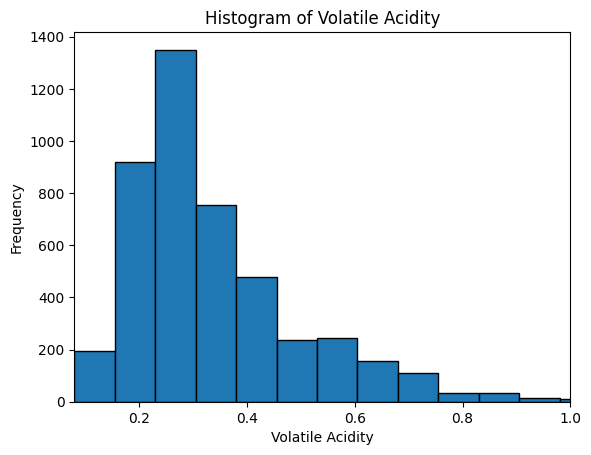

In [24]:
# Create a histogram
plt.hist(train.volatile_acidity, bins=20, edgecolor='black')

plt.xlim(min(train.volatile_acidity), 1)

# Add labels and title
plt.xlabel('Volatile Acidity')
plt.ylabel('Frequency')
plt.title('Histogram of Volatile Acidity')

# Display the histogram
plt.show()

In [25]:
statistic, p_value = stats.shapiro(train['volatile_acidity'])

if p_value > 0.05:
    print("Volatile Acidity appears to be normally distributed (p-value =", p_value, " s-value=",statistic, ")")
else:
    print("Volatile Acidity does not appear to be normally distributed (p-value =", p_value, " s-value=",statistic, ")")


Volatile Acidity does not appear to be normally distributed (p-value = 0.0  s-value= 0.8766323328018188 )


<font size="3">Volatile Acidity is `NOT` normally distributed?</font>

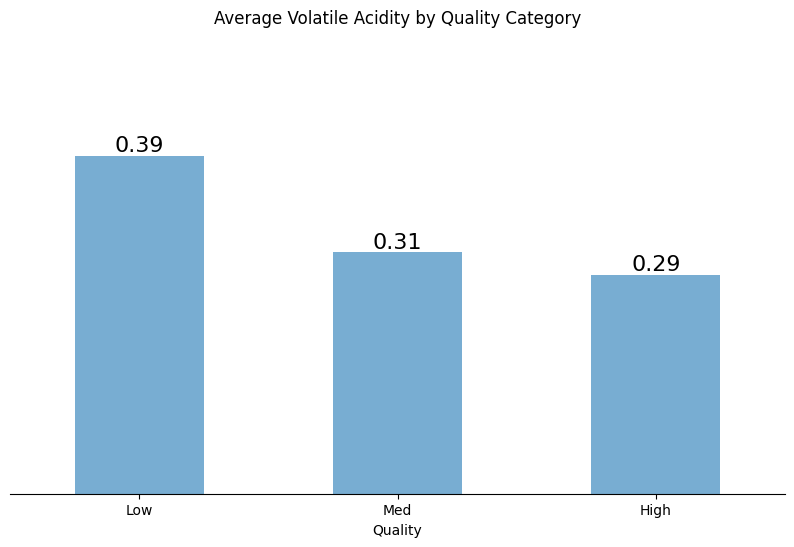

In [26]:
# Define custom labels for "quality"
bins_q = [3, 5, 6, 9]
labels_q = ['Low', 'Med', 'High']

# Create a new column "quality_bins" to store the bin labels
train['quality_bins'] = pd.cut(train['quality'], bins=bins_q, labels=labels_q)

# Group the data by "quality" and calculate the mean alcohol content for each quality category
quality_means = train.groupby('quality_bins')['volatile_acidity'].mean().round(6)

# Create a bar plot
plt.figure(figsize=(10, 6))
quality_means.plot(kind='bar', color='#1f77b4', alpha=0.6)
plt.title('Average Volatile Acidity by Quality Category')
plt.xlabel('Quality')
plt.ylabel('Average Volatile Acidity')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Adding average on top of each bar
for i, count in enumerate(quality_means.values):
    plt.text(i, count, '{:.2f}'.format(count), ha='center', va='bottom', fontsize=16)

# Removing the y-axis
plt.gca().get_yaxis().set_visible(False)

# Removing left, right, and top lines of the current axes
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.ylim(0.1, .5)

# Remove the "quality_bins" column from the DataFrame
train.drop(columns=['quality_bins'], inplace=True)

# Show the plot
plt.show()

<font size="4"> **Hypothesis 3: Volatile Acidity Impact**</font>
   <font size="3"> 
   
   - *Question:* `Does the Volatile Acidity impact wine Quality?`
   </font>

H0: There is no statistically significant monotonic relationship between the quality of the wine and the Volatile Acidity.

Ha: There is a sstatistically significant monotonic relationship between the quality of the wine and the Volatile Acidity.

In [27]:
# Assuming you have a DataFrame named df with columns 'quality' and 'alcohol'
spearman_corr, p_value = stats.spearmanr(train['quality'], train['volatile_acidity'])

# Interpret the results
alpha = 0.05  # Set your desired significance level

if p_value < alpha:
    print(f"There is a statistically significant Spearman's rank correlation (p-value = {p_value:.4f}, corr = {spearman_corr:.4f}).")
else:
    print(f"There is no statistically significant Spearman's rank correlation (p-value = {p_value:.4f}, corr = {spearman_corr:.4f}).")


There is a statistically significant Spearman's rank correlation (p-value = 0.0000, corr = -0.2609).


<font size="3">We `reject` the null hypothesis</font>

___
<font size="5">Exploration Summary</font><br>
___

We performed `PearsonR` test on: 

 - Alcohol
 - Density
 - Volatile Acidity
 
 `All indicated a significant monotonic relationship`


In [28]:
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.linear_model import LinearRegression, Lasso

def kbest_features(df, col_name, k=2):
    """
    Selects the top k best features for regression from a DataFrame.

    Parameters:
        df (DataFrame): The input DataFrame containing features and the target column.
        col_name (str): The name of the target column.
        k (int): The number of top features to select (default is 2).

    Returns:
        selected_df (DataFrame): A DataFrame with two columns: 'Column Name' and 'Score'.
            'Column Name' contains the column names of the selected features.

    Example:
        selected_features = select_k_best_features(your_dataframe, 'value', k=2)
    """
    # Create X and y
    X = df.drop(columns=[col_name])  # Remove the target column
    y = df[col_name]
    
    # Filter X to keep only columns that can be converted to float
    X = X.select_dtypes(include=['number', 'float'])  # Keep numeric and float columns
    
    # Initialize SelectKBest with f_regression
    skb = SelectKBest(f_regression, k=k)
    
    # Fit SelectKBest on X and y
    skb.fit(X, y)
    
    # Get the mask of selected features
    skb_mask = skb.get_support()
    
    # Get the scores for all features
    feature_scores = skb.scores_
    
    # Create a DataFrame with column names and scores
    selected_df = pd.DataFrame({
        'Kbest': X.columns[skb_mask],
        'Score': feature_scores[skb_mask]
    })
    
    # Sort the DataFrame by score in descending order
    selected_df = selected_df.sort_values(by='Score', ascending=False)
    
    selected_df.reset_index(drop=True, inplace=True)
    
    selected_df.drop('Score', axis=1, inplace=True)
    
    return selected_df

# -----------------------------------------------------------------------------------------------
# -----------------------------------------------------------------------------------------------

def rfe_features(df, col_name, n_features=3):
    """
    Selects a specified number of features from a DataFrame using Linear Regression and RFE.

    Parameters:
        df (pd.DataFrame): The input DataFrame containing the features and target variable.
        col_name (str): The name of the target column.
        n_features (int): The number of features to select (default is 3).

    Returns:
        pd.Series: A Series containing the selected feature names.
    """
    # Drop the target column from the DataFrame
    X = df.drop(columns=[col_name])
    
    # Select columns with numeric or float data types
    X = X.select_dtypes(include=['number', 'float'])
    
    # Extract the target variable
    y = df[col_name]
    
    # Initialize a Linear Regression model
    lm = LinearRegression()
    
    # Initialize RFE (Recursive Feature Elimination) with the specified number of features to select
    rfe = RFE(lm, n_features_to_select=n_features)
    
    # Fit RFE on the data
    rfe.fit(X, y)
    
    # Get the mask of selected features
    rfe_mask = rfe.get_support()
    
    # Get the column names of selected features
    selected_features = X.columns[rfe_mask]
    
    # Create a DataFrame to present the selected features
    selected_df = pd.DataFrame({'RFE': selected_features})
    
    return selected_df

# -----------------------------------------------------------------------------------------------
# -----------------------------------------------------------------------------------------------

def lasso_features(df, col_name, k=2):
    """
    Performs LASSO feature selection to select the top k features for regression from a DataFrame.

    Parameters:
        df (DataFrame): The input DataFrame containing features and the target column.
        col_name (str): The name of the target column.
        k (int): The number of top features to select (default is 2).

    Returns:
        selected_df (DataFrame): A DataFrame with two columns: 'Column Name' and 'Coefficient'.
            'Column Name' contains the column names of the selected features.
            'Coefficient' contains the corresponding LASSO regression coefficients.

    Example:
        selected_features = lasso_feature_selection(your_dataframe, 'value', k=2)
    """
    # Create X and y
    X = df.drop(columns=[col_name])  # Remove the target column
    y = df[col_name]
    
    # Filter X to keep only numeric and float columns
    X = X.select_dtypes(include=['number', 'float'])
    
    # Initialize LASSO regression with alpha=1.0 (adjust as needed)
    lasso = Lasso(alpha=0.5, max_iter=100000)
    
    # Fit LASSO on X and y
    lasso.fit(X, y)
    
    # Create a DataFrame with selected column names and their coefficients
    selected_df = pd.DataFrame({
        'Lasso': X.columns,
        'Coefficient': lasso.coef_
    })
    
    # Sort the DataFrame by absolute coefficient value in descending order
    selected_df['Coefficient'] = abs(selected_df['Coefficient'])
    selected_df = selected_df.sort_values(by='Coefficient', ascending=False)
    
    # Keep the top k features
    selected_df = selected_df.head(k)
    
    selected_df.reset_index(drop=True, inplace=True)
    
    selected_df.drop('Coefficient', axis=1, inplace=True)
    
    return selected_df

# -----------------------------------------------------------------------------------------------
# -----------------------------------------------------------------------------------------------

def feature_selections_results(df, col_name, k=2):
    """
    Combine the results of three feature selection functions into a final DataFrame.

    Parameters:
    df (DataFrame): The input DataFrame containing features and the target column.
    col_name (str): The name of the target column.
    k (int, optional): The number of top features to select (default is 2).

    Returns:
    DataFrame: A DataFrame containing the selected features from three different feature selection methods.
    """
    selected_df1 = kbest_features(df, col_name, k)
    selected_df2 = rfe_features(df, col_name, k)
    selected_df3 = lasso_features(df, col_name, k)
    
    final_selected_df = pd.concat([selected_df1, selected_df2, selected_df3], axis=1)
    
    return final_selected_df

# -----------------------------------------------------------------------------------------------
# -----------------------------------------------------------------------------------------------

def MinMax_Scaler(df):
    """
    Apply Min-Max scaling to selected columns of a DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the columns to be scaled.

    Returns:
        pd.DataFrame: The DataFrame with specified columns scaled using Min-Max scaling.

    Note:
        - The function applies Min-Max scaling to numeric columns (float or int) in the DataFrame.
        - The 'value' column is excluded from scaling.
        - The selected columns are scaled to the range [0, 1].
    """
    mms = MinMaxScaler()

    # Select columns to scale (excluding 'value')
    to_scale = df.select_dtypes(include=['float', 'int']).columns.tolist()
    to_scale.remove('quality')

    # Apply Min-Max scaling to the selected columns
    df[to_scale] = mms.fit_transform(df[to_scale])
    
    return df

# -----------------------------------------------------------------------------------------------
# -----------------------------------------------------------------------------------------------

def MinMax_Scaler_xy(df):
    """
    Apply Min-Max scaling to selected columns of a DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the columns to be scaled.

    Returns:
        pd.DataFrame: The DataFrame with specified columns scaled using Min-Max scaling.

    Note:
        - The function applies Min-Max scaling to numeric columns (float or int) in the DataFrame.
        - The 'value' column is excluded from scaling.
        - The selected columns are scaled to the range [0, 1].
    """
    mms = MinMaxScaler()

    # Select columns to scale (excluding 'value')
    to_scale = df.select_dtypes(include=['float', 'int']).columns.tolist()

    # Apply Min-Max scaling to the selected columns
    df[to_scale] = mms.fit_transform(df[to_scale])
    
    return df

# -----------------------------------------------------------------------------------------------
# -----------------------------------------------------------------------------------------------

def hot_encode(df):
    """
    Perform one-hot encoding on a DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame containing categorical columns to be one-hot encoded.

    Returns:
        pd.DataFrame: The DataFrame with categorical columns converted to one-hot encoded columns.

    Note:
        - The function uses pd.get_dummies to perform one-hot encoding on the specified DataFrame.
        - All categorical columns are one-hot encoded without dropping the first category (drop_first=False).
    """
    # Use pd.get_dummies to one-hot encode the DataFrame
    df = pd.get_dummies(df, drop_first=True)
    
    return df

def xy_split(df):
    """
    Split the input DataFrame into feature matrix (X) and target vector (y).
    
    Parameters:
    df (DataFrame): The input DataFrame containing features and target.
    
    Returns:
    X (DataFrame): Feature matrix (all columns except 'value').
    y (Series): Target vector (column 'value').
    """
    # Split the dataset into feature columns (X) and target column (y)
    return df.drop(columns=['quality']), df.quality

def data_pipeline(df):
    train, val, test = wine_train_val_test(df)
    #train, val, test = scale_train_val_test(train, val, test)
    train = hot_encode(train)
    val = hot_encode(train)
    test = hot_encode(train)
    X_train, y_train = xy_split(train)
    X_val, y_val = xy_split(val)
    X_test, y_test = xy_split(test)
    return train, val, test, X_train, y_train, X_val, y_val, X_test, y_test

We performed feature selection using:
 
- `SelectKbest`
- `RFE`
- `LASSO`

In [29]:
feature_selections_results(train, 'quality', 4)

,Kbest,RFE,Lasso
0,alcohol,volatile_acidity,free_sulfur_dioxide
1,density,chlorides,total_sulfur_dioxide
2,volatile_acidity,density,fixed_acidity
3,chlorides,sulphates,volatile_acidity


- free_sulfur_dioxide
- chlorides
- total_sulfur_dioxide
- volatile_acidity
- sulphates
- fixed_aciditydd

In [30]:
train = hot_encode(train)

___
<font size="5">Modeling</font><br>
___

In [31]:
from math import sqrt
from sklearn.metrics import mean_squared_error

def eval_baseline(y_train):
    """
    Evaluate the baseline model's performance using the root mean squared error (RMSE).

    Parameters:
        y_train (pd.Series): The target variable from the training dataset.

    Returns:
        float: The RMSE score representing the baseline model's performance.

    Note:
        - The function creates a baseline model by predicting the mean value of the training target variable for all samples.
        - It calculates the RMSE between the actual target values and the mean predictions.
        - The RMSE score quantifies the baseline model's performance.
    """
    baselines = pd.DataFrame({'y_actual': y_train, 'y_mean': y_train.mean()})
    
    return sqrt(mean_squared_error(baselines.y_actual, baselines.y_mean))

In [32]:
train, val, test, X_train, y_train, X_val, y_val, X_test, y_test = data_pipeline(df)

In [33]:
eval_baseline(y_train)

0.8812045100258817

In [34]:
from sklearn.ensemble import RandomForestRegressor

def eval_model(y_actual, y_hat):
    """
    Evaluate a model's performance using the root mean squared error (RMSE).

    Parameters:
        y_actual (pd.Series): The actual target values.
        y_hat (pd.Series or np.array): The predicted target values.

    Returns:
        float: The RMSE score representing the model's performance.

    Note:
        - The function calculates the RMSE between the actual target values and the predicted values.
        - The RMSE score quantifies the model's performance, where lower values indicate better performance.
    """
    return sqrt(mean_squared_error(y_actual, y_hat))

def update_model_results(model_name, train_rmse, val_rmse, model_results=None):
    """
    Update a DataFrame with model evaluation results (RMSE) for a given model.

    Parameters:
        model_name (str): The name or identifier of the model.
        train_rmse (float): The root mean squared error (RMSE) on the training dataset.
        val_rmse (float): The root mean squared error (RMSE) on the validation dataset.
        model_results (pd.DataFrame, optional): An existing DataFrame containing model results. Default is None.

    Returns:
        pd.DataFrame: An updated DataFrame with the new model's results.

    Note:
        - The function creates a DataFrame with the model's name and RMSE results on the training and validation datasets.
        - If `model_results` is provided, it concatenates the new results with the existing DataFrame.
        - If `model_results` is not provided, it creates a new DataFrame to store the results.
    """
    # Create a DataFrame with model name and RMSE results
    results_df = pd.DataFrame({
        'Model': [model_name],
        'Train_RMSE': [train_rmse],
        'Val_RMSE': [val_rmse]
    })
    
    # Check if model_results already exists
    if model_results is not None:
        # Concatenate results with existing DataFrame
        model_results = pd.concat([model_results, results_df], ignore_index=True)
    else:
        # Create a new DataFrame if it doesn't exist
        model_results = results_df

    return model_results

# -----------------------------------------------------------------------------------------------
# -----------------------------------------------------------------------------------------------

def train_model(model_name, X_train, y_train, X_val, y_val, model_results=None):
    """
    Train a machine learning model, evaluate its performance, and update the model results DataFrame.

    Parameters:
        model_name (class): The machine learning model class (e.g., LinearRegression).
        X_train (pd.DataFrame): The feature matrix of the training dataset.
        y_train (pd.Series): The target variable of the training dataset.
        X_val (pd.DataFrame): The feature matrix of the validation dataset.
        y_val (pd.Series): The target variable of the validation dataset.
        model_results (pd.DataFrame, optional): An existing DataFrame containing model results. Default is None.

    Returns:
    model: Trained machine learning model.
    model_results: Updated DataFrame containing model name and RMSE results.

    Note:
        - The function trains a machine learning model on the provided training data.
        - It evaluates the model's performance on both the training and validation sets using RMSE.
        - RMSE values are printed for both sets in a formatted manner.
        - The model name is extracted from the class and used for updating the model results DataFrame.
        - If `model_results` is provided, it is updated with the new model's results.
        - If `model_results` is not provided, a new DataFrame is created to store the results.
    """
    # Fit the model on the training data
    model = model_name()
    model.fit(X_train, y_train)
    
    # Make predictions on the training set
    train_preds = model.predict(X_train)
    
    # Calculate RMSE on the training set
    train_rmse = eval_model(y_train, train_preds)
    
    # Make predictions on the validation set
    val_preds = model.predict(X_val)
    
    # Calculate RMSE on the validation set
    val_rmse = eval_model(y_val, val_preds)
    
    # Print RMSE values for training and validation sets (formatted)
    train_rmse_formatted = "${:,.2f}".format(train_rmse)
    val_rmse_formatted = "${:,.2f}".format(val_rmse)
    print(f'The train RMSE is {train_rmse_formatted}.')
    print(f'The validate RMSE is {val_rmse_formatted}.')
    
    # Extract the name of the model class without the module path
    model_name = model.__class__.__name__

    # Update the model results DataFrame
    model_results = update_model_results(model_name, train_rmse_formatted, val_rmse_formatted, model_results)

    return model, model_results


In [35]:
rforest, model_results = train_model(RandomForestRegressor, X_train, y_train, X_val, y_val)

The train RMSE is $0.23.
The validate RMSE is $0.23.


In [36]:
from xgboost import XGBRegressor

In [37]:
xgbr, model_results = train_model(XGBRegressor, X_train, y_train, X_val, y_val, model_results)

The train RMSE is $0.25.
The validate RMSE is $0.25.


In [38]:
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor

In [39]:
lasso, model_results = train_model(LassoLars, X_train, y_train, X_val, y_val, model_results)

The train RMSE is $0.88.
The validate RMSE is $0.88.


In [40]:
linearr, model_results = train_model(LinearRegression, X_train, y_train, X_val, y_val, model_results)

The train RMSE is $0.74.
The validate RMSE is $0.74.


In [41]:
tweedie, model_results = train_model(TweedieRegressor, X_train, y_train, X_val, y_val, model_results)

The train RMSE is $0.79.
The validate RMSE is $0.79.


In [42]:
model_results

,Model,Train_RMSE,Val_RMSE
0,RandomForestRegressor,$0.23,$0.23
1,XGBRegressor,$0.25,$0.25
2,LassoLars,$0.88,$0.88
3,LinearRegression,$0.74,$0.74
4,TweedieRegressor,$0.79,$0.79


____
____

## MODEL SECOND ROUND - SCALED
____
____

In [43]:
train, val, test, X_train, y_train, X_val, y_val, X_test, y_test = data_pipeline(df)

In [44]:
train = MinMax_Scaler_xy(train)
val = MinMax_Scaler_xy(val)
val = MinMax_Scaler_xy(test)

#Scale X_df because data_pipeline does not scale it
X_train = MinMax_Scaler_xy(X_train)
X_val = MinMax_Scaler_xy(X_val)
X_test = MinMax_Scaler_xy(X_test)

In [45]:
eval_baseline(y_train)

0.8812045100258817

In [46]:
rforest, model_results = train_model(RandomForestRegressor, X_train, y_train, X_val, y_val)

The train RMSE is $0.23.
The validate RMSE is $0.23.


In [47]:
from xgboost import XGBRegressor

In [48]:
xgbr, model_results = train_model(XGBRegressor, X_train, y_train, X_val, y_val, model_results)

The train RMSE is $0.25.
The validate RMSE is $0.25.


In [49]:
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor

In [50]:
lasso, model_results = train_model(LassoLars, X_train, y_train, X_val, y_val, model_results)

The train RMSE is $0.88.
The validate RMSE is $0.88.


In [51]:
linearr, model_results = train_model(LinearRegression, X_train, y_train, X_val, y_val, model_results)

The train RMSE is $0.74.
The validate RMSE is $0.74.


In [52]:
# Tweedie seems to get worse with scaled data
tweedie, model_results = train_model(TweedieRegressor, X_train, y_train, X_val, y_val, model_results)

The train RMSE is $0.87.
The validate RMSE is $0.87.


In [53]:
model_results

,Model,Train_RMSE,Val_RMSE
0,RandomForestRegressor,$0.23,$0.23
1,XGBRegressor,$0.25,$0.25
2,LassoLars,$0.88,$0.88
3,LinearRegression,$0.74,$0.74
4,TweedieRegressor,$0.87,$0.87


____
____

## MODEL THIRD ROUND
#### Cluster Featrue (alcohol & desity)
____
____

df['density'] = df[]

In [54]:
train, val, test, X_train, y_train, X_val, y_val, X_test, y_test = data_pipeline(df)

In [55]:
train = MinMax_Scaler_xy(train)
val = MinMax_Scaler_xy(val)
val = MinMax_Scaler_xy(test)

#Scale X_df because data_pipeline does not scale it
X_train = MinMax_Scaler_xy(X_train)
X_val = MinMax_Scaler_xy(X_val)
X_test = MinMax_Scaler_xy(X_test)

In [56]:
eval_baseline(y_train)

0.8812045100258817

In [57]:
rforest, model_results = train_model(RandomForestRegressor, X_train, y_train, X_val, y_val)

The train RMSE is $0.23.
The validate RMSE is $0.23.


In [58]:
from xgboost import XGBRegressor

In [59]:
xgbr, model_results = train_model(XGBRegressor, X_train, y_train, X_val, y_val, model_results)

The train RMSE is $0.25.
The validate RMSE is $0.25.


In [60]:
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor

In [61]:
lasso, model_results = train_model(LassoLars, X_train, y_train, X_val, y_val, model_results)

The train RMSE is $0.88.
The validate RMSE is $0.88.


In [62]:
linearr, model_results = train_model(LinearRegression, X_train, y_train, X_val, y_val, model_results)

The train RMSE is $0.74.
The validate RMSE is $0.74.


In [63]:
# Tweedie seems to get worse with scaled data
tweedie, model_results = train_model(TweedieRegressor, X_train, y_train, X_val, y_val, model_results)

The train RMSE is $0.87.
The validate RMSE is $0.87.


In [64]:
model_results

,Model,Train_RMSE,Val_RMSE
0,RandomForestRegressor,$0.23,$0.23
1,XGBRegressor,$0.25,$0.25
2,LassoLars,$0.88,$0.88
3,LinearRegression,$0.74,$0.74
4,TweedieRegressor,$0.87,$0.87


____
____

## MODEL THIRD ROUND
#### Cluster Featrue (alcohol & desity)
____
____

____
____

## MODEL THIRD ROUND
#### Cluster Featrue (alcohol & desity)
____
____

In [65]:
# Create and fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get the coefficients
coefficients = model.coef_

In [66]:
coefficients

array([ 1.09536049, -2.30806371, -0.12983687,  4.25431265, -0.19020352,
        0.86320533, -0.5607935 , -5.34049466,  0.64324002,  1.33396865,
        1.42754143, -0.32469545])

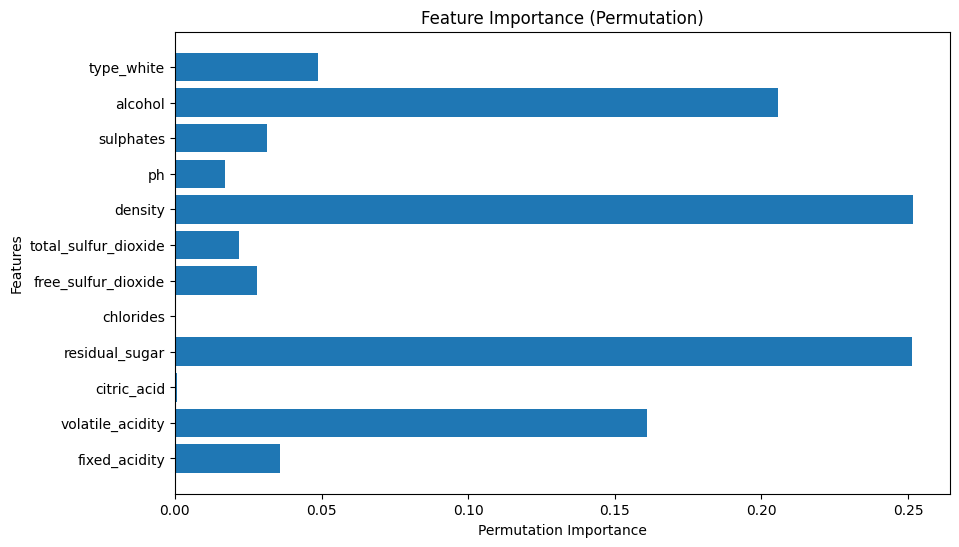

In [67]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(model, X_train, y_train, n_repeats=30, random_state=0)

# Plot the permutation importance scores
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, perm_importance.importances_mean)
plt.xlabel('Permutation Importance')
plt.ylabel('Features')
plt.title('Feature Importance (Permutation)')
plt.show()

# imports:

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor


from prepare import zillow_pipeline, model_pipeline
from explore_plus import perform_spearmanr_test, feature_selections_results, MinMax_Scaler, hot_encode, features
from visuals import plot_value_distribution, area_vs_value_plt, age_vs_value_plt, bedr_vs_value_plt, bathr_vs_value_plt, county_vs_value_plt, area_vs_value_trend_plt
from model_plus import split_train_val_test, scale_train_val_test, data_pipeline, eval_baseline, train_model, poly_features, test_model, eval_model, data_pipeline_fix

In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4547 entries, 3761 to 860
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4547 non-null   float64
 1   volatile_acidity      4547 non-null   float64
 2   citric_acid           4547 non-null   float64
 3   residual_sugar        4547 non-null   float64
 4   chlorides             4547 non-null   float64
 5   free_sulfur_dioxide   4547 non-null   float64
 6   total_sulfur_dioxide  4547 non-null   float64
 7   density               4547 non-null   float64
 8   ph                    4547 non-null   float64
 9   sulphates             4547 non-null   float64
 10  alcohol               4547 non-null   float64
 11  quality               4547 non-null   float64
 12  type_white            4547 non-null   bool   
dtypes: bool(1), float64(12)
memory usage: 466.2 KB


In [69]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type_white
3761,0.516949,0.273333,0.186992,0.027607,0.129568,0.123711,0.322485,0.148255,0.023622,0.125000,0.231405,0.500000,True
3740,0.330508,0.133333,0.284553,0.225460,0.078073,0.206186,0.328402,0.244650,0.417323,0.159091,0.264463,0.333333,True
1359,0.661017,0.263333,0.325203,0.012270,0.136213,0.034364,0.065089,0.191440,0.259843,0.244318,0.336088,0.500000,False
1230,0.330508,0.066667,0.276423,0.032209,0.094684,0.096220,0.153846,0.146327,0.496063,0.318182,0.628099,0.500000,False
4751,0.322034,0.113333,1.000000,0.061350,0.043189,0.343643,0.852071,0.059186,0.228346,0.119318,0.842975,0.500000,True


In [70]:
kmeans = KMeans(n_clusters=3, n_init='auto')
features = train[['alcohol', 'density']]
kmeans.fit(features)

KMeans(n_clusters=3, n_init='auto')

In [71]:
train['sk_clusters'] = kmeans.labels_

In [72]:
features = train[['alcohol', 'density', 'sk_clusters']]

In [73]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type_white,sk_clusters
3761,0.516949,0.273333,0.186992,0.027607,0.129568,0.123711,0.322485,0.148255,0.023622,0.125000,0.231405,0.500000,True,0
3740,0.330508,0.133333,0.284553,0.225460,0.078073,0.206186,0.328402,0.244650,0.417323,0.159091,0.264463,0.333333,True,0
1359,0.661017,0.263333,0.325203,0.012270,0.136213,0.034364,0.065089,0.191440,0.259843,0.244318,0.336088,0.500000,False,0
1230,0.330508,0.066667,0.276423,0.032209,0.094684,0.096220,0.153846,0.146327,0.496063,0.318182,0.628099,0.500000,False,2
4751,0.322034,0.113333,1.000000,0.061350,0.043189,0.343643,0.852071,0.059186,0.228346,0.119318,0.842975,0.500000,True,2


In [78]:
train, val, test, X_train, y_train, X_val, y_val, X_test, y_test = data_pipeline(df)

In [79]:
bins = [3, 5, 6, 9]

# Define custom labels
labels = ['3-5', '6', '7-9']

# Create a new column "quality_bins" to store the bin labels
train['quality_bins'] = pd.cut(train['quality'], bins=bins, labels=labels)

In [80]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type_white,quality_bins
3761,9.9,0.490,0.23,2.4,0.087,19.0,115.0,0.99480,2.77,0.44,9.400000,6,True,6
3740,7.7,0.280,0.35,15.3,0.056,31.0,117.0,0.99980,3.27,0.50,9.600000,5,True,3-5
1359,11.6,0.475,0.40,1.4,0.091,6.0,28.0,0.99704,3.07,0.65,10.033333,6,False,6
1230,7.7,0.180,0.34,2.7,0.066,15.0,58.0,0.99470,3.37,0.78,11.800000,6,False,6
4751,7.6,0.250,1.23,4.6,0.035,51.0,294.0,0.99018,3.03,0.43,13.100000,6,True,6


<function matplotlib.pyplot.show(close=None, block=None)>

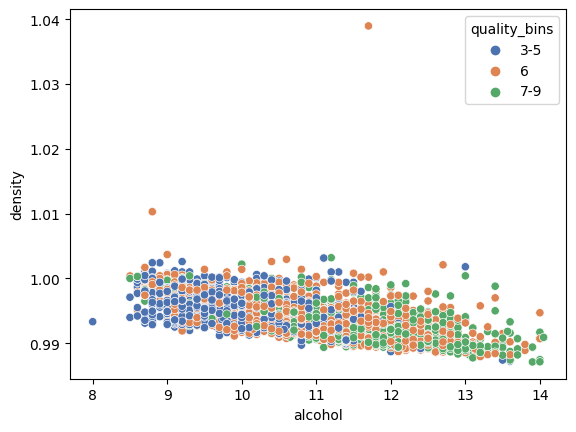

In [81]:
sns.scatterplot(data=train, x='alcohol', y='density', hue='quality_bins', palette='deep')
# plt.ylim(min(train.density), 1.005)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

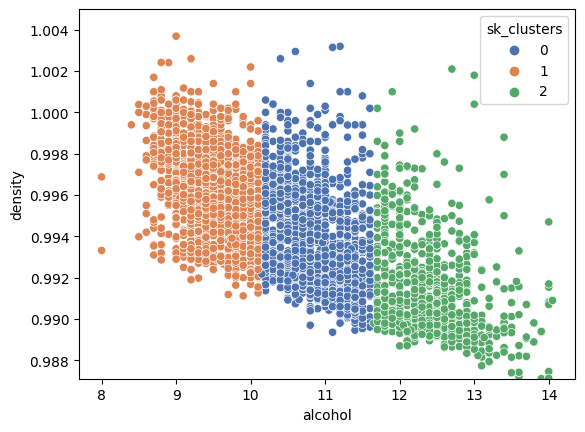

In [81]:
sns.scatterplot(data=train, x='alcohol', y='density', hue='sk_clusters', palette='deep')
plt.ylim(min(train.density), 1.005)
plt.show

In [54]:
train_scaled = MinMax_Scaler(train)

In [55]:
train_scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type_white
3761,0.516949,0.273333,0.186992,0.027607,0.129568,0.123711,0.322485,0.148255,0.023622,0.125000,0.231405,6,True
3740,0.330508,0.133333,0.284553,0.225460,0.078073,0.206186,0.328402,0.244650,0.417323,0.159091,0.264463,5,True
1359,0.661017,0.263333,0.325203,0.012270,0.136213,0.034364,0.065089,0.191440,0.259843,0.244318,0.336088,6,False
1230,0.330508,0.066667,0.276423,0.032209,0.094684,0.096220,0.153846,0.146327,0.496063,0.318182,0.628099,6,False
4751,0.322034,0.113333,1.000000,0.061350,0.043189,0.343643,0.852071,0.059186,0.228346,0.119318,0.842975,6,True


In [56]:
kmeans = KMeans(n_clusters=3, n_init='auto')
features = train_scaled[['alcohol', 'density']]
kmeans.fit(features)

KMeans(n_clusters=3, n_init='auto')

In [57]:
train_scaled['sk_clusters'] = kmeans.labels_

In [58]:
features = train_scaled[['alcohol', 'density', 'sk_clusters']]

<function matplotlib.pyplot.show(close=None, block=None)>

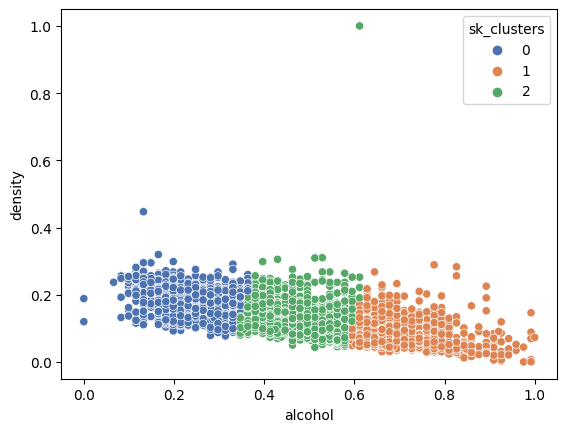

In [61]:
sns.scatterplot(data=train_scaled, x='alcohol', y='density', hue='sk_clusters', palette='deep')
#plt.ylim(min(train_scaled.density), .5)
plt.show

In [89]:
# Loop through each unique value of "quality"
subset_data = train_scaled[train_scaled['quality'] == 7]

In [90]:
subset_data

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type,alcohol_bins,sk_clusters,quality_bins
5128,7.1,0.350,0.27,3.10,0.034,28.0,134.0,0.98970,3.26,0.38,13.1,7,white,12-14,2,7-9
4698,6.7,0.340,0.40,2.10,0.033,34.0,111.0,0.98924,2.97,0.48,12.2,7,white,12-14,2,7-9
2187,6.9,0.280,0.27,2.10,0.036,42.0,121.0,0.99260,3.42,0.49,10.8,7,white,10-11,0,7-9
5503,5.0,0.455,0.18,1.90,0.036,33.0,106.0,0.98746,3.21,0.83,14.0,7,white,12-14,2,7-9
6005,6.3,0.290,0.29,3.30,0.037,32.0,140.0,0.98950,3.17,0.36,12.8,7,white,12-14,2,7-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4843,6.7,0.210,0.36,8.55,0.020,20.0,86.0,0.99146,3.19,0.22,13.4,7,white,12-14,2,7-9
4117,7.1,0.120,0.30,3.10,0.018,15.0,37.0,0.99004,3.02,0.52,11.9,7,white,11-12,2,7-9
3385,7.4,0.330,0.26,2.60,0.040,29.0,115.0,0.99130,3.07,0.52,11.8,7,white,11-12,2,7-9
4426,6.4,0.140,0.31,1.20,0.034,53.0,138.0,0.99084,3.38,0.35,11.5,7,white,11-12,0,7-9


In [105]:
# # Loop through each unique value of "quality"
# unique_qualities = train['quality'].unique()

# for quality_value in unique_qualities:
#     # Subset the data for the current quality value
#     subset_data = train[train['quality'] == quality_value]
    
#     # Create a scatterplot for the subset of data
#     sns.pairplot(data=subset_data, height=3)
    
#     # Show the plot
#     plt.show()

In [104]:
# import matplotlib.pyplot as plt

# # Loop through each unique value of "quality"
# unique_qualities = train['quality'].unique()

# for quality_value in unique_qualities:
#     # Subset the data for the current quality value
#     subset_data = train[train['quality'] == quality_value]

#     # Iterate through columns
#     for col in subset_data.columns:
#         # Skip the quality column itself
#         if col == 'quality':
#             continue

#         # Create scatterplot
#         plt.scatter(subset_data[col], subset_data.iloc[:, 0])  # Scatter the first column against the current column
#         plt.xlabel(col)
#         plt.ylabel(subset_data.columns[0])  # Use the name of the first column as the y-axis label
#         plt.title(f"Scatterplot: {col} vs {subset_data.columns[0]} (Quality {quality_value})")
#         plt.show()  # Show the scatterplot


In [ ]:
# # Define custom labels for "quality"
# bins_q = [3, 5, 6, 9]
# labels_q = ['Low', 'Med', 'High']

# # Create a new column "quality_bins" to store the bin labels
# df['quality_bins'] = pd.cut(df['quality'], bins=bins_q, labels=labels_q)

# # Define bin edges and labels for "alcohol"
# bin_edges = [8, 9, 10, 11, 12, 14]
# bin_labels = ['8-9', '9-10', '10-11', '11-12', '12-14']

# # Bin the "alcohol" column
# df['alcohol_bins'] = pd.cut(df['alcohol'], bins=bin_edges, labels=bin_labels)

# # Group by "quality_bins" and "alcohol_bins" and count occurrences
# grouped = df.groupby(['quality_bins', 'alcohol_bins']).size().unstack(fill_value=0)

# # Create a custom gradient color palette with specific hexadecimal color codes
# custom_palette = sns.color_palette(["#39C97E", "#98CD7C", "#E8D07B", "#E07E58", "#D93D3D"], n_colors=len(bin_labels))

# # Create a grouped bar plot with the custom gradient color palette
# ax = grouped.plot(kind='bar', figsize=(10, 6), color=custom_palette)
# plt.xlabel('Quality')
# plt.ylabel('Count')
# plt.title('Alcohol vs Quality (Binned)')
# plt.xticks(rotation=0)
# plt.legend(title='Alcohol Range')
# plt.show()

In [84]:
import pandas as pd

# Assuming df is your DataFrame

# Exclude non-numeric columns ('type' in this case)
numeric_df = df.select_dtypes(include=['number'])

# Create an empty DataFrame to store the results
result_dfs = []

# Loop through each numeric feature
for feature in numeric_df.columns:
    # Calculate the correlation matrix for the current feature
    correlation_matrix = numeric_df.corrwith(numeric_df[feature])
    
    # Create a DataFrame to store the results for the current feature
    result_df = pd.DataFrame({'Feature': correlation_matrix.index, 'Correlation': correlation_matrix.values})
    
    # Sort the DataFrame by the absolute correlation values in descending order
    result_df = result_df.iloc[(-result_df.iloc[:, 1].abs()).argsort()]
    
    # Append the result to the list
    result_dfs.append(result_df)

# Print and display each correlation matrix separately
for idx, result_df in enumerate(result_dfs):
    print(f"Correlation matrix for feature '{numeric_df.columns[idx]}':")
    print(result_df)
    print("\n")


Correlation matrix for feature 'fixed_acidity':
                 Feature  Correlation
0          fixed_acidity     1.000000
7                density     0.458910
6   total_sulfur_dioxide    -0.329054
2            citric_acid     0.324436
9              sulphates     0.299568
4              chlorides     0.298195
5    free_sulfur_dioxide    -0.282735
8                     ph    -0.252700
1       volatile_acidity     0.219008
3         residual_sugar    -0.111981
10               alcohol    -0.095452
11               quality    -0.076743


Correlation matrix for feature 'volatile_acidity':
                 Feature  Correlation
1       volatile_acidity     1.000000
6   total_sulfur_dioxide    -0.414476
2            citric_acid    -0.377981
4              chlorides     0.377124
5    free_sulfur_dioxide    -0.352557
7                density     0.271296
11               quality    -0.265699
8                     ph     0.261454
9              sulphates     0.225984
0          fixed_acidity 

In [82]:
import pandas as pd

# Assuming df is your DataFrame

# Exclude non-numeric columns ('type' in this case)
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)


                      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density        ph  sulphates   alcohol   quality
fixed_acidity              1.000000          0.219008     0.324436       -0.111981   0.298195            -0.282735             -0.329054  0.458910 -0.252700   0.299568 -0.095452 -0.076743
volatile_acidity           0.219008          1.000000    -0.377981       -0.196011   0.377124            -0.352557             -0.414476  0.271296  0.261454   0.225984 -0.037640 -0.265699
citric_acid                0.324436         -0.377981     1.000000        0.142451   0.038998             0.133126              0.195242  0.096154 -0.329808   0.056197 -0.010493  0.085532
residual_sugar            -0.111981         -0.196011     0.142451        1.000000  -0.128940             0.402871              0.495482  0.552517 -0.267320  -0.185927 -0.359415 -0.036980
chlorides                  0.298195          0.377124     0.

In [31]:
import pandas as pd
import scipy.stats as stats

# Create an empty DataFrame to store the ANOVA results
anova_results = pd.DataFrame(columns=['Feature', 'F-statistic', 'p-value'])

# Perform ANOVA for each numerical column
for column in df.columns:
    if column != 'quality' and df[column].dtype != 'object':  # Exclude non-numeric and the 'quality' column
        group_data = [group[column] for name, group in df.groupby('quality')]
        f_statistic, p_value = stats.f_oneway(*group_data)
        anova_results = pd.concat([anova_results, pd.DataFrame({'Feature': [column], 'F-statistic': [f_statistic], 'p-value': [p_value]})], ignore_index=True)

# Print the ANOVA results
print(anova_results)

                 Feature  F-statistic        p-value
0          fixed acidity     8.004193   1.258439e-08
1       volatile acidity    96.674022  8.168059e-117
2            citric acid     9.310199   3.443125e-10
3         residual sugar     9.111367   5.969040e-10
4              chlorides    50.849719   1.953578e-61
5    free sulfur dioxide    14.939170   4.774295e-17
6   total sulfur dioxide     7.716088   2.768378e-08
7                density   136.951236  6.581609e-164
8                     pH     2.021462   5.931925e-02
9              sulphates     4.325773   2.313182e-04
10               alcohol   320.593448   0.000000e+00


In [22]:
# Create an empty DataFrame to store the ANOVA results
anova_results = pd.DataFrame(columns=['Feature', 'F-statistic', 'p-value', 'Hypothesis'])

# Perform ANOVA for each numerical column
for column in df.columns:
    if column != 'quality' and df[column].dtype != 'object':  # Exclude non-numeric and the 'quality' column
        group_data = [group[column] for name, group in df.groupby('quality')]
        f_statistic, p_value = stats.f_oneway(*group_data)
        
        # Determine whether to "Reject" or "Fail to Reject" the null hypothesis
        if p_value < 0.05:
            hypothesis = "Reject"
        else:
            hypothesis = "Fail to Reject"
        
        anova_results = pd.concat([anova_results, pd.DataFrame({'Feature': [column], 'F-statistic': [f_statistic], 'p-value': [p_value], 'Hypothesis': [hypothesis]})], ignore_index=True)
        
        anova_results = anova_results.sort_values(by='F-statistic', ascending=False)

# Print the ANOVA results with the hypothesis decision
print(anova_results)

                 Feature  F-statistic        p-value      Hypothesis
10               alcohol   320.593448   0.000000e+00          Reject
0                density   136.951236  6.581609e-164          Reject
1       volatile acidity    96.674022  8.168059e-117          Reject
2              chlorides    50.849719   1.953578e-61          Reject
3    free sulfur dioxide    14.939170   4.774295e-17          Reject
4            citric acid     9.310199   3.443125e-10          Reject
5         residual sugar     9.111367   5.969040e-10          Reject
6          fixed acidity     8.004193   1.258439e-08          Reject
7   total sulfur dioxide     7.716088   2.768378e-08          Reject
8              sulphates     4.325773   2.313182e-04          Reject
9                     pH     2.021462   5.931925e-02  Fail to Reject


In [19]:
import pandas as pd

# Assuming df is your DataFrame

# Exclude non-numeric columns ('type' in this case)
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Extract the correlation values for the "quality" column
correlation_with_quality = correlation_matrix["quality"]

# Create a DataFrame to store the results
result_df = pd.DataFrame({'Feature': correlation_matrix.columns, 'Correlation with Quality': correlation_with_quality})

# Sort the DataFrame by the absolute correlation values in descending order
result_df = result_df.iloc[(-result_df['Correlation with Quality'].abs()).argsort()]

# Display the result DataFrame
print(result_df)


                                   Feature  Correlation with Quality
quality                            quality                  1.000000
alcohol                            alcohol                  0.444319
density                            density                 -0.305858
volatile acidity          volatile acidity                 -0.265699
chlorides                        chlorides                 -0.200666
citric acid                    citric acid                  0.085532
fixed acidity                fixed acidity                 -0.076743
free sulfur dioxide    free sulfur dioxide                  0.055463
total sulfur dioxide  total sulfur dioxide                 -0.041385
sulphates                        sulphates                  0.038485
residual sugar              residual sugar                 -0.036980
pH                                      pH                  0.019506


In [20]:
# Sort the DataFrame by the absolute correlation values in descending order
result_df_descending = result_df.sort_values(by='Correlation with Quality', ascending=False)
print(result_df_descending)

                                   Feature  Correlation with Quality
quality                            quality                  1.000000
alcohol                            alcohol                  0.444319
citric acid                    citric acid                  0.085532
free sulfur dioxide    free sulfur dioxide                  0.055463
sulphates                        sulphates                  0.038485
pH                                      pH                  0.019506
residual sugar              residual sugar                 -0.036980
total sulfur dioxide  total sulfur dioxide                 -0.041385
fixed acidity                fixed acidity                 -0.076743
chlorides                        chlorides                 -0.200666
volatile acidity          volatile acidity                 -0.265699
density                            density                 -0.305858


In [ ]:
train.density.max()

1.03898

In [ ]:
# Your density data
density_data = train.density  # Replace this with your data

# Calculate bin edges
bin_width = (1.03900 - np.min(density_data)) / 50
bin_edges = np.arange(np.min(density_data), 1.03900 + bin_width, bin_width)

# Create histogram
hist, bins = np.histogram(density_data, bins=bin_edges)

# Print the value ranges and count in each bin
for i in range(len(hist)):
    start_range = bins[i]
    end_range = bins[i + 1] if i < len(hist) - 1 else 1.03900
    count = hist[i]
    print(f"Bin {i+1}: {start_range:.4f} - {end_range:.4f}: {count} values")


Bin 1: 0.9871 - 0.9881: 11 values
Bin 2: 0.9881 - 0.9892: 67 values
Bin 3: 0.9892 - 0.9902: 256 values
Bin 4: 0.9902 - 0.9913: 346 values
Bin 5: 0.9913 - 0.9923: 450 values
Bin 6: 0.9923 - 0.9933: 479 values
Bin 7: 0.9933 - 0.9944: 421 values
Bin 8: 0.9944 - 0.9954: 529 values
Bin 9: 0.9954 - 0.9965: 593 values
Bin 10: 0.9965 - 0.9975: 536 values
Bin 11: 0.9975 - 0.9985: 465 values
Bin 12: 0.9985 - 0.9996: 219 values
Bin 13: 0.9996 - 1.0006: 135 values
Bin 14: 1.0006 - 1.0016: 20 values
Bin 15: 1.0016 - 1.0027: 11 values
Bin 16: 1.0027 - 1.0037: 6 values
Bin 17: 1.0037 - 1.0048: 0 values
Bin 18: 1.0048 - 1.0058: 0 values
Bin 19: 1.0058 - 1.0068: 0 values
Bin 20: 1.0068 - 1.0079: 0 values
Bin 21: 1.0079 - 1.0089: 0 values
Bin 22: 1.0089 - 1.0099: 0 values
Bin 23: 1.0099 - 1.0110: 2 values
Bin 24: 1.0110 - 1.0120: 0 values
Bin 25: 1.0120 - 1.0131: 0 values
Bin 26: 1.0131 - 1.0141: 0 values
Bin 27: 1.0141 - 1.0151: 0 values
Bin 28: 1.0151 - 1.0162: 0 values
Bin 29: 1.0162 - 1.0172: 0 valu

In [ ]:
# Your density data
density_data = train.density  # Replace this with your data

# Calculate bin edges
bin_width = (1.03900 - np.min(density_data)) / 16
bin_edges = np.arange(np.min(density_data), 1.03900 + bin_width, bin_width)

# Create histogram
hist, bins = np.histogram(density_data, bins=bin_edges)

# Print the value ranges and count in each bin
for i in range(len(hist)):
    start_range = bins[i]
    end_range = bins[i + 1] if i < len(hist) - 1 else 1.03900
    count = hist[i]
    print(f"Bin {i+1}: {start_range:.4f} - {end_range:.4f}: {count} values")
1.0027

Bin 1: 0.9871 - 0.9904: 367 values
Bin 2: 0.9904 - 0.9936: 1343 values
Bin 3: 0.9936 - 0.9968: 1648 values
Bin 4: 0.9968 - 1.0001: 1089 values
Bin 5: 1.0001 - 1.0033: 95 values
Bin 6: 1.0033 - 1.0066: 2 values
Bin 7: 1.0066 - 1.0098: 0 values
Bin 8: 1.0098 - 1.0131: 2 values
Bin 9: 1.0131 - 1.0163: 0 values
Bin 10: 1.0163 - 1.0195: 0 values
Bin 11: 1.0195 - 1.0228: 0 values
Bin 12: 1.0228 - 1.0260: 0 values
Bin 13: 1.0260 - 1.0293: 0 values
Bin 14: 1.0293 - 1.0325: 0 values
Bin 15: 1.0325 - 1.0358: 0 values
Bin 16: 1.0358 - 1.0390: 1 values
Bin 17: 1.0390 - 1.0390: 0 values
